In [ ]:
import simpy 
import numpy as np
import random
import matplotlib.pyplot as plt

In [290]:
"""
Bank renege example

Covers:

- Resources: Resource
- Condition events

Scenario:
  A counter with a random service time and customers who renege. Based on the
  program bank08.py from TheBank tutorial of SimPy 2. (KGM)

"""
import random
import simpy

waiting_times = []
service_times = []

def source(env, number, lambd, mu, counter, B_distribution, shortest_job_first=False):
    """Source generates customers randomly"""
    t0 = np.random.exponential(1/lambd) # Arrival time of first customer
    yield env.timeout(t0)

    for i in range(number):
        c = customer(env, 'Customer%02d' % i, counter, mu, B_distribution, shortest_job_first)
        env.process(c)

        # A distribution
        t = np.random.exponential(1/lambd)
        yield env.timeout(t)
   
def customer(env, name, counter, mu, B_distribution, shortest_job_first=False):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    # print('%7.4f %s: Here I am' % (arrive, name))

    # B distribution
    service_time = B_distribution() # np.random.exponential(1/mu)
    # print(service_time)

    priority = service_time if shortest_job_first else 1

    with counter.request(priority=priority) as req: 
        yield req
        wait = env.now - arrive
        waiting_times.append(wait)
        # print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
        service_times.append(service_time)
        yield env.timeout(service_time)
        # print('%7.4f %s: Finished' % (env.now, name))

In [296]:
RANDOM_SEED = 42
NEW_CUSTOMERS = 10000 # Total number of customers
LAMBD = 1/12
MU = 1/11
random.seed(RANDOM_SEED)

def mmc_sim(new_customers, lambd, mu, capacity, B_distribution, shortest_job_first=False):
    global waiting_times
    global service_times
    waiting_times = []
    service_times = []
    
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.PriorityResource(env, capacity=capacity)
    env.process(source(env, new_customers, lambd, mu, counter, B_distribution, shortest_job_first))
    env.run()
    
    return waiting_times, service_times

In [312]:
mu = 1/11
capacity = 1

l_wt_mm1 = []
for i in range(100): 
    waiting_times, service_times = mmc_sim(100, 1/12, mu, capacity, lambda: np.random.exponential(1/mu))

    l_wt_mm1.append(waiting_times)

l_wt_mm2 = []
for i in range(100):
    waiting_times, service_times = mmc_sim(100, 2/12, mu, capacity, lambda: np.random.exponential(1/mu))

    l_wt_mm2.append(waiting_times)

mm1_means = np.mean(l_wt_mm1)
mm2_means = np.mean(l_wt_mm2)

mm1_std = np.std(l_wt_mm1)
mm2_std = np.std(l_wt_mm2)

In [313]:
print(np.mean(mm1_means))
print(np.mean(mm2_means))

52.52115932706301
270.87892554666604


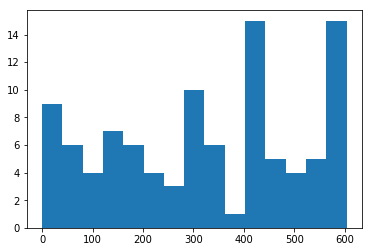

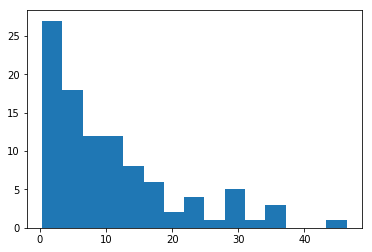

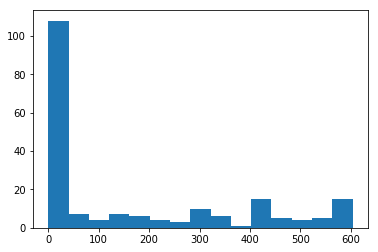

In [314]:
sojourn_time = waiting_times + service_times
plt.hist(waiting_times, bins = 15)
plt.show()
plt.hist(service_times, bins = 15)
plt.show()
plt.hist(sojourn_time, bins = 15)
plt.show()

In [ ]:
p_0_inverse = 0
rho = LAMBD/(c*MU)

for n in range(c):
    p_0_inverse += (c*rho)**n/math.factorial(n) + ((c*rho)**c/math.factorial(c))/(1-rho)

p_0 = 1/p_0_inverse
p_c = (c*rho)**c/math.factorial(c) * p_0
delay_probability = p_c/(1-rho)
E_W = delay_probability * (1/(1-rho)) * 1/(c*MU)

print(f'Theoretical mean waiting time = {E_W}')
print(f'Empirical mean waiting time = {np.mean(waiting_times)}')